In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
#Basic Graphing
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Advance Graphing
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

%matplotlib inline


ModuleNotFoundError: No module named 'plotly'

In [3]:
#Decided not to use Numba

#from numba import jit, cuda, vectorize

In [3]:
%load_ext cython
import Cython

In [38]:
#Do not run cell new filename is being used
df2 = pd.read_csv("QVI_transaction_data.xlsx")

In [3]:
df2 = pd.read_excel("QVI_transaction_2.xlsx")

In [5]:
df = pd.read_csv("QVI_purchase_behaviour.csv")

In [ ]:
#Note new_dates2 was renamed to new_dates
new_dates = pd.read_excel("new_dates.xlsx")

In [ ]:
#Contains quantities of purchases
quantities = pd.read_excel("Quantaties.xlsx")

In [6]:
all_data = pd.read_excel("all_data.xlsx")

In [26]:
#Note to self salsa columns(WW, Doritos, Old El Paso) of new_dates_no_salsa can be dropped data is all zeroes
new_dates_no_salsa = pd.read_excel("new_dates_no_salsa.xlsx")

In [5]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [7]:
df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [8]:
df.info

<bound method DataFrame.info of        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]>

In [9]:
df['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='LIFESTAGE', ylabel='Count'>

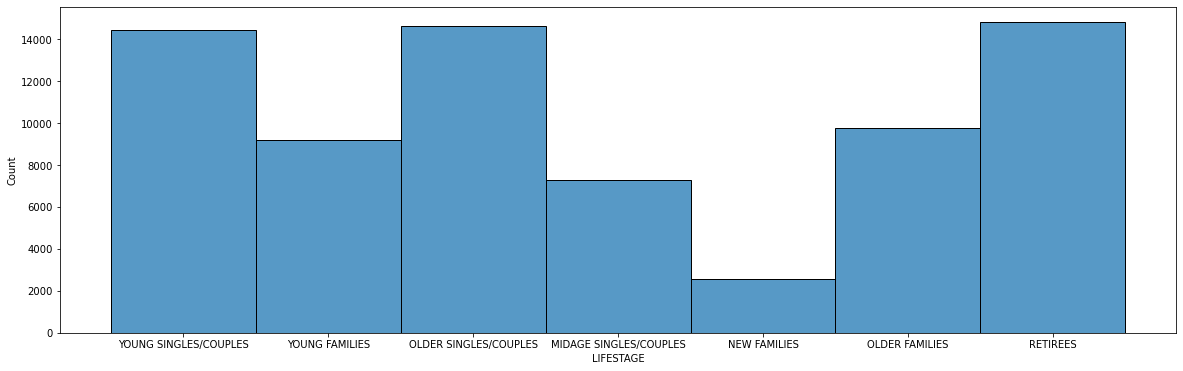

In [10]:
figure = plt.figure(figsize= (20, 6))


sns.histplot(data = df['LIFESTAGE'])

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

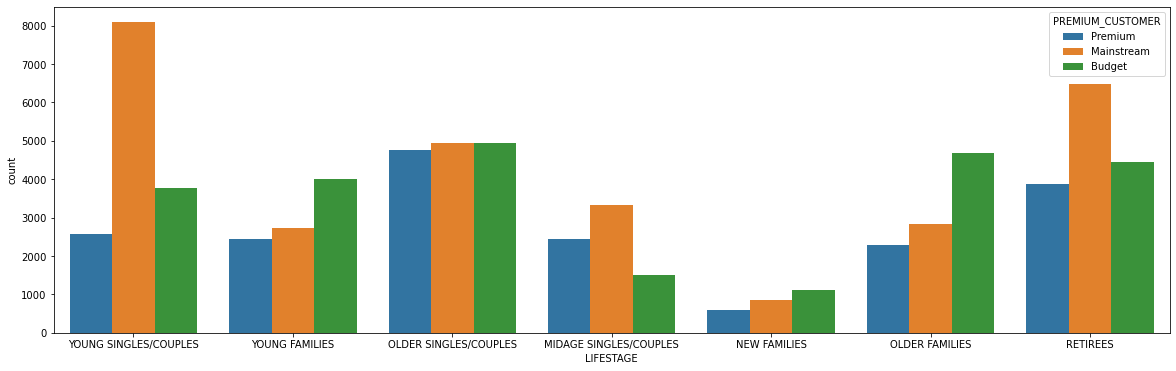

In [11]:
figure = plt.figure(figsize= (20, 6))



sns.countplot(x= 'LIFESTAGE', data = df, hue='PREMIUM_CUSTOMER')

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

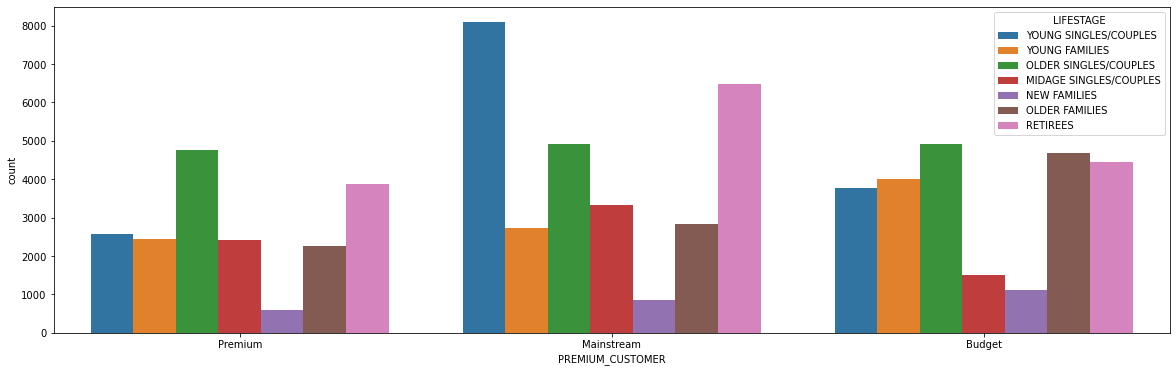

In [12]:
figure = plt.figure(figsize= (20, 6))


sns.countplot(x= 'PREMIUM_CUSTOMER', data = df, hue='LIFESTAGE')

<Figure size 1440x2160 with 0 Axes>

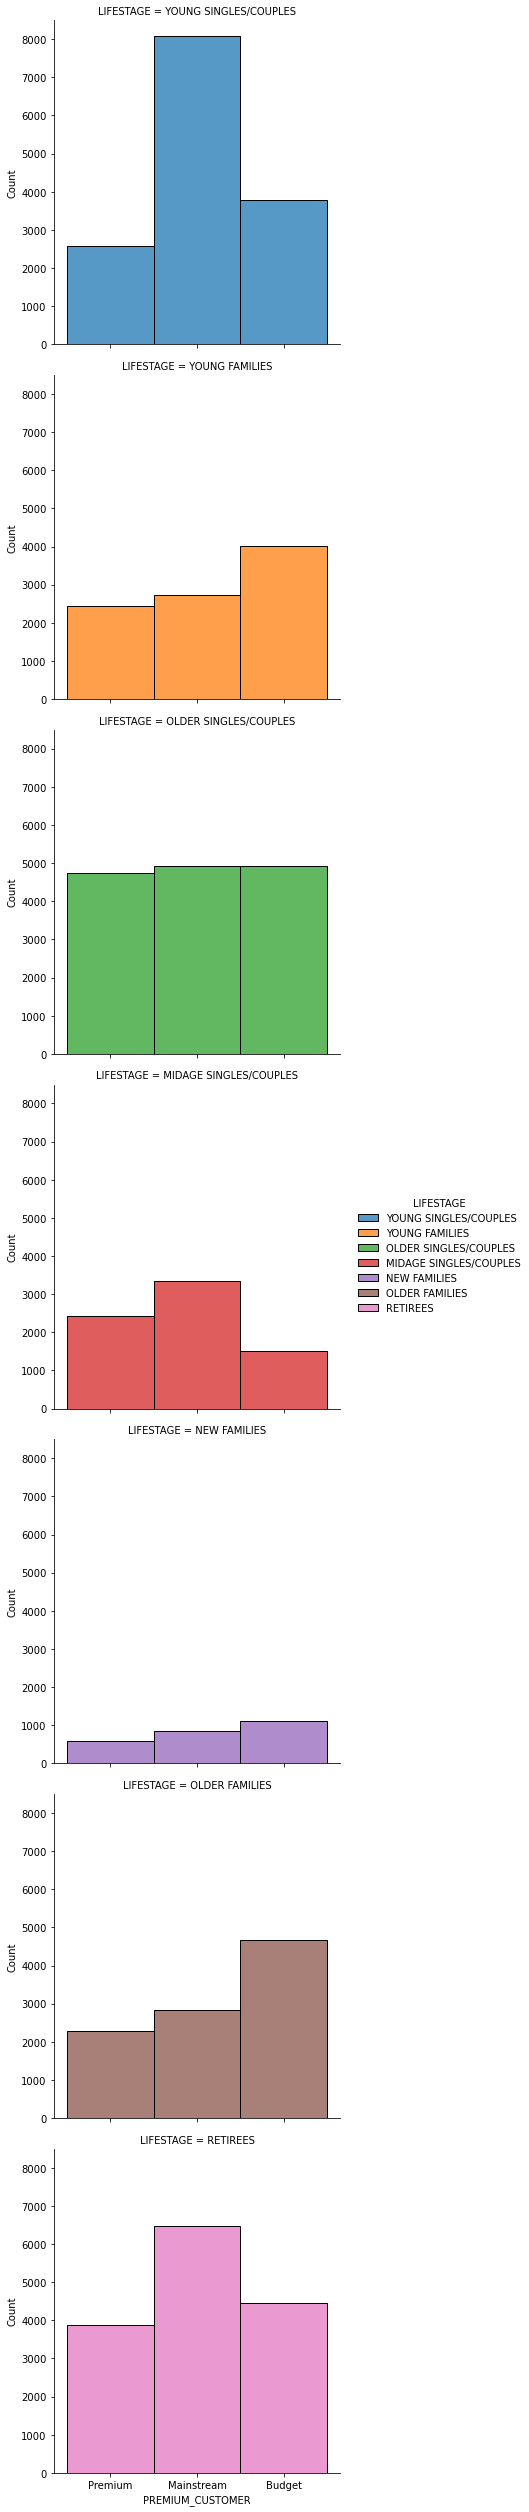

In [13]:
figure = plt.figure(figsize= (20, 30))


sns.displot(x= 'PREMIUM_CUSTOMER', data = df, hue='LIFESTAGE', row='LIFESTAGE')

<Figure size 1440x2160 with 0 Axes>

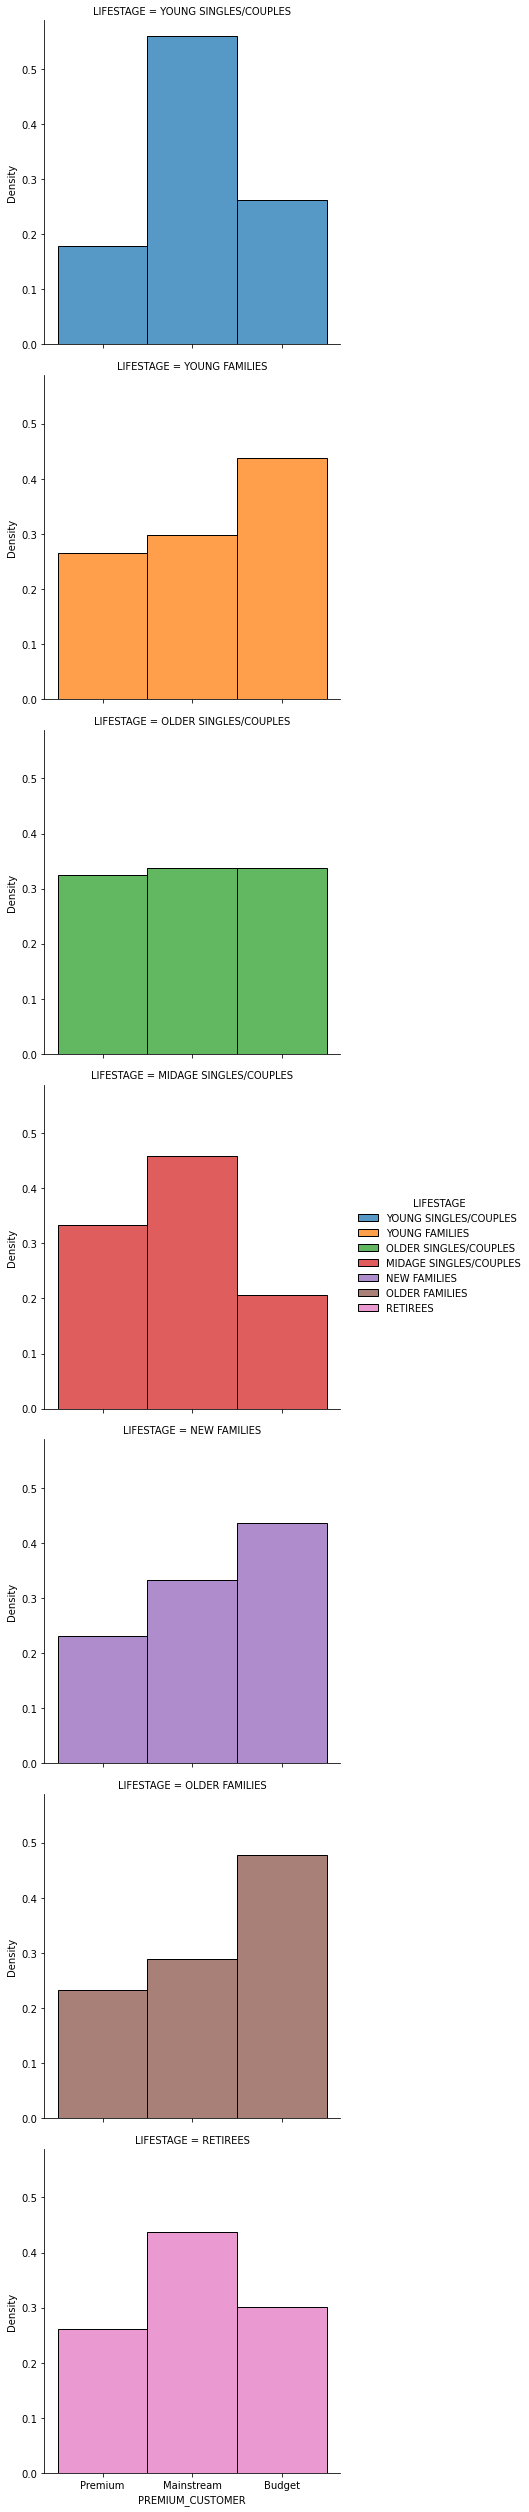

In [14]:
figure = plt.figure(figsize= (20, 30))


sns.displot(x= 'PREMIUM_CUSTOMER', 
            data = df,
            hue='LIFESTAGE',
            row='LIFESTAGE',
            stat = 'density',
            common_norm = False)

In [15]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='Count'>

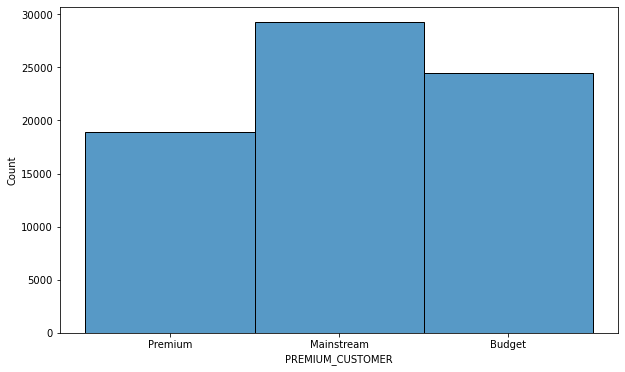

In [16]:
figure = plt.figure(figsize= (10, 6))


sns.histplot(data = df['PREMIUM_CUSTOMER'])

In [17]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [18]:
#No Missing Data in QVI purhase behaviour

In [19]:
# Exploratory Data Analysis transaction data

In [17]:
"""
'Old El Paso Salsa   Dip Chnky Tom Ht300g' is most common dip/salsa
'Old El Paso Salsa   Dip Tomato Med 300g'
'Old El Paso Salsa   Dip Tomato Mild 300g'
'Woolworths Mild     Salsa 300g',
'Doritos Salsa Mild  300g',
'Doritos Salsa Medium 300g'
'Woolworths Medium   Salsa 300g'

"""
j = 0

for i in df2['PROD_NAME'].value_counts():
    print(f"{i}\t {df2['PROD_NAME'].value_counts().index[j]}")
    j = j+1

3304	 Kettle Mozzarella   Basil & Pesto 175g
3296	 Kettle Tortilla ChpsHny&Jlpno Chili 150g
3269	 Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
3268	 Tyrrells Crisps     Ched & Chives 165g
3265	 Cobs Popd Sea Salt  Chips 110g
3257	 Kettle 135g Swt Pot Sea Salt
3252	 Tostitos Splash Of  Lime 175g
3242	 Infuzions Thai SweetChili PotatoMix 110g
3233	 Smiths Crnkle Chip  Orgnl Big Bag 380g
3229	 Thins Potato Chips  Hot & Spicy 175g
3219	 Kettle Sensations   Camembert & Fig 150g
3217	 Doritos Corn Chips  Cheese Supreme 170g
3210	 Pringles Barbeque   134g
3204	 Doritos Corn Chip Mexican Jalapeno 150g
3200	 Kettle Sweet Chilli And Sour Cream 175g
3197	 Smiths Crinkle Chips Salt & Vinegar 330g
3188	 Thins Chips Light&  Tangy 175g
3183	 Dorito Corn Chp     Supreme 380g
3177	 Pringles Sweet&Spcy BBQ 134g
3174	 Infuzions BBQ Rib   Prawn Crackers 110g
3174	 Tyrrells Crisps     Lightly Salted 165g
3173	 Kettle Sea Salt     And Vinegar 175g
3172	 Doritos Corn Chip Southern Chicken 150g
3170	 Twisties Chi

In [23]:
#top 5: Kettle, Dorito, Smith, Pringles, Red Rock Deli
df2[['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs',
       'Dorito', 'French', 'Grain', 'Infuzions', 'Kettle', 'Natural', 'Old',
       'Pringles', 'Red', 'Smith', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'Woolworths']].mean()

Burger        0.017872
CCs           0.017184
Cheetos       0.011052
Cheezels      0.017381
Cobs          0.036600
Dorito        0.106274
French        0.010784
Grain         0.029226
Infuzions     0.053622
Kettle        0.155901
Natural       0.028203
Old           0.035207
Pringles      0.094784
Red           0.067133
Smith         0.120162
Sunbites      0.011358
Thins         0.053146
Tostitos      0.035762
Twisties      0.035698
Tyrrells      0.024325
Woolworths    0.055722
dtype: float64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264834 non-null  int64  
 1   STORE_NBR       264834 non-null  int64  
 2   LYLTY_CARD_NBR  264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOT_SALES       264834 non-null  float64
 8   Burger          264834 non-null  bool   
 9   CCs             264834 non-null  bool   
 10  Cheetos         264834 non-null  bool   
 11  Cheezels        264834 non-null  bool   
 12  Cobs            264834 non-null  bool   
 13  Dorito          264834 non-null  bool   
 14  French          264834 non-null  bool   
 15  Grain           264834 non-null  bool   
 16  Infuzions       264834 non-null  bool   
 17  Kettle    

In [32]:
#note to self or_merge function was removed since '|' could be used instead

#Note to self some columns became int64 when or_merge was used  
df2[['Burger','CCs','Cheetos',
    'Cheezels', 'Cobs', 'Dorito',
    'French', 'Grain', 'GrnWves',
    'Infuzions', 'Infzns', 'Kettle',
    'NCC', 'Natural', 'Old', 'Pringles',
    'RRD', 'Red', 'Smith', 'Snbts',
    'Sunbites', 'Thins', 'Tostitos',
    'Twisties', 'Tyrrells', 'WW', 'Woolworths']] = df2[['Burger','CCs','Cheetos',
                                                        'Cheezels', 'Cobs', 'Dorito',
                                                        'French', 'Grain', 'GrnWves',
                                                        'Infuzions', 'Infzns', 'Kettle',
                                                        'NCC', 'Natural', 'Old', 'Pringles',
                                                        'RRD', 'Red', 'Smith', 'Snbts',
                                                        'Sunbites', 'Thins', 'Tostitos',
                                                        'Twisties', 'Tyrrells', 'WW', 'Woolworths']].astype('bool')

In [ ]:
df2[['Burger','CCs','Cheetos',
    'Cheezels', 'Cobs', 'Dorito',
    'French', 'Grain',
    'Infuzions', 'Kettle',
    'Natural', 'Old', 'Pringles',
    'Red', 'Smith', 'Sunbites', 
    'Thins', 'Tostitos',
    'Twisties', 'Tyrrells', 'Woolworths', 
    'Old El Paso Salsa   Dip Chnky Tom Ht300g', 
    'Old El Paso Salsa   Dip Tomato Med 300g',
    'Old El Paso Salsa   Dip Tomato Mild 300g',
    'Doritos Salsa Mild  300g',
    'Doritos Salsa       Medium 300g',
    'Woolworths Mild     Salsa 300g',
    'Woolworths Medium   Salsa 300g']] = df2[['Burger','CCs','Cheetos',
                                            'Cheezels', 'Cobs', 'Dorito',
                                                        'French', 'Grain',
                                                        'Infuzions',  'Kettle',
                                                        'Natural', 'Old', 'Pringles',
                                                        'Red', 'Smith', 'Sunbites',
                                                        'Thins', 'Tostitos',
                                                        'Twisties', 'Tyrrells', 'Woolworths',
                                                        'Old El Paso Salsa   Dip Chnky Tom Ht300g', 
                                                        'Old El Paso Salsa   Dip Tomato Med 300g',
                                                        'Old El Paso Salsa   Dip Tomato Mild 300g',
                                                        'Doritos Salsa Mild  300g',
                                                        'Doritos Salsa       Medium 300g',
                                                        'Woolworths Mild     Salsa 300g',
                                                        'Woolworths Medium   Salsa 300g']].astype('bool')

In [15]:
df2.to_excel("QVI_transaction_data.xlsx", index = False)

In [16]:
#Note: There used to be 35 columns but after or_merge 29. Dropped WW, Snbites, Infzns, Grnwves, RRD
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264834 non-null  int64  
 1   STORE_NBR       264834 non-null  int64  
 2   LYLTY_CARD_NBR  264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOT_SALES       264834 non-null  float64
 8   Burger          264834 non-null  bool   
 9   CCs             264834 non-null  bool   
 10  Cheetos         264834 non-null  bool   
 11  Cheezels        264834 non-null  bool   
 12  Cobs            264834 non-null  bool   
 13  Dorito          264834 non-null  bool   
 14  French          264834 non-null  bool   
 15  Grain           264834 non-null  bool   
 16  Infuzions       264834 non-null  bool   
 17  Kettle    

In [23]:
df2.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,...,Red,Smith,Snbts,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,...,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000
mean,43464.036230,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,0.017872,0.017184,0.011052,...,0.022221,0.120162,0.005951,0.005407,0.053146,0.035762,0.035698,0.024325,0.038968,0.016754
std,105.389007,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,0.132485,0.129958,0.104547,...,0.147403,0.325152,0.076912,0.073334,0.224326,0.185697,0.185536,0.154055,0.193519,0.128348
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43373.000000,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43464.000000,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43555.000000,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#No missing data
df2.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
Burger            0
CCs               0
Cheetos           0
Cheezels          0
Cobs              0
Dorito            0
French            0
Grain             0
GrnWves           0
Infuzions         0
Infzns            0
Kettle            0
NCC               0
Natural           0
Old               0
Pringles          0
RRD               0
Red               0
Smith             0
Snbts             0
Sunbites          0
Thins             0
Tostitos          0
Twisties          0
Tyrrells          0
WW                0
Woolworths        0
dtype: int64

In [51]:
df2['STORE_NBR'].value_counts()

226    2020
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
31        2
206       2
76        1
92        1
Name: STORE_NBR, Length: 272, dtype: int64

In [26]:
df2['LYLTY_CARD_NBR'].value_counts()

172032    18
162039    18
116181    17
230078    17
13138     17
          ..
14263      1
6194       1
16310      1
12212      1
2049       1
Name: LYLTY_CARD_NBR, Length: 72636, dtype: int64

In [46]:
df2['PROD_NBR'].value_counts()

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 114, dtype: int64

In [28]:
df2['PROD_QTY'].value_counts()

2    236039
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

In [45]:
#Remove outliers
df2.drop(index = df2['PROD_QTY'][df2['PROD_QTY'][:]==200].index, inplace = True)

In [46]:
df2.to_excel("QVI_transaction_data.xlsx", index = False)

In [44]:
list(np.sort(df2['PROD_NAME'].unique()))

['Burger Rings 220g',
 'CCs Nacho Cheese    175g',
 'CCs Original 175g',
 'CCs Tasty Cheese    175g',
 'Cheetos Chs & Bacon Balls 190g',
 'Cheetos Puffs 165g',
 'Cheezels Cheese 330g',
 'Cheezels Cheese Box 125g',
 'Cobs Popd Sea Salt  Chips 110g',
 'Cobs Popd Sour Crm  &Chives Chips 110g',
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
 'Dorito Corn Chp     Supreme 380g',
 'Doritos Cheese      Supreme 330g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Doritos Corn Chips  Cheese Supreme 170g',
 'Doritos Corn Chips  Nacho Cheese 170g',
 'Doritos Corn Chips  Original 170g',
 'Doritos Mexicana    170g',
 'Doritos Salsa       Medium 300g',
 'Doritos Salsa Mild  300g',
 'French Fries Potato Chips 175g',
 'Grain Waves         Sweet Chilli 210g',
 'Grain Waves Sour    Cream&Chives 210G',
 'GrnWves Plus Btroot & Chilli Jam 180g',
 'Infuzions BBQ Rib   Prawn Crackers 110g',
 'Infuzions Mango     Chutny Papadums 70g',
 'Infuzions SourCream&Herbs Veg St

In [41]:
brand_names = set()

In [42]:
for i in list(np.sort(df2['PROD_NAME'].unique())):
    
    for j in i.split():
        
        brand_names.add(j)
        
        break

In [43]:
print(sorted(list(brand_names)))

['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito', 'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns', 'Kettle', 'NCC', 'Natural', 'Old', 'Pringles', 'RRD', 'Red', 'Smith', 'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties', 'Tyrrells', 'WW', 'Woolworths']


In [29]:
len(brand_names)

29

In [30]:
remove_elements = ['Dorito', 'WW', 'Smith', 'Snbts', 'NCC', 'Infzns', 'GrnWves', 'RRD']

for i in remove_elements:
    brand_names.remove(i)

In [31]:
len(brand_names)

21

In [32]:
print(*sorted(list(brand_names)), sep = '\n')

Burger
CCs
Cheetos
Cheezels
Cobs
Doritos
French
Grain
Infuzions
Kettle
Natural
Old
Pringles
Red
Smiths
Sunbites
Thins
Tostitos
Twisties
Tyrrells
Woolworths


In [39]:
j = []

for i in df2['PROD_NAME']:
    
    try:
        j.append( int( i[-4:-1] ) )
    
    except:
        j.append(i)
        



In [40]:
df2 = pd.concat([df2, pd.DataFrame(j)], axis = 1)

175

In [46]:
for i in df2.index:
    
    if df2.loc[i, 0] == 'Kettle 135g Swt Pot Sea Salt':
        df2.loc[i, 0] = 135

In [51]:
df2.columns = [          'DATE',      'STORE_NBR', 'LYLTY_CARD_NBR',         'TXN_ID',
             'PROD_NBR',      'PROD_NAME',       'PROD_QTY',      'TOT_SALES',
               'Burger',            'CCs',        'Cheetos',       'Cheezels',
                 'Cobs',         'Dorito',         'French',          'Grain',
            'Infuzions',         'Kettle',        'Natural',            'Old',
             'Pringles',            'Red',          'Smith',       'Sunbites',
                'Thins',       'Tostitos',       'Twisties',       'Tyrrells',
           'Woolworths',                'Weight']

In [7]:
df2.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Burger', 'CCs', 'Cheetos',
       'Cheezels', 'Cobs', 'Dorito', 'French', 'Grain', 'Infuzions', 'Kettle',
       'Natural', 'Old', 'Pringles', 'Red', 'Smith', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths', 'Weight',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Old El Paso Salsa   Dip Tomato Mild 300g', 'Doritos Salsa Mild  300g',
       'Doritos Salsa       Medium 300g', 'Woolworths Mild     Salsa 300g',
       'Woolworths Medium   Salsa 300g', 'Salsa'],
      dtype='object')

In [9]:
df2.loc[:, 'Woolworths'] = (df2['Woolworths Mild     Salsa 300g']|df2['Woolworths Medium   Salsa 300g']) ^ df2['Woolworths']

In [10]:
df2.loc[:, 'Dorito'] = (df2['Doritos Salsa       Medium 300g']|df2['Doritos Salsa Mild  300g']) ^ df2['Dorito']

In [11]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Burger,CCs,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,False,...,False,175,False,False,False,False,False,False,False,False
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,False,True,...,False,175,False,False,False,False,False,False,False,False
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,False,...,False,170,False,False,False,False,False,False,False,False
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,False,...,False,175,False,False,False,False,False,False,False,False
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,False,...,False,150,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,False,False,...,False,175,False,False,False,False,False,False,False,False
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,False,False,...,False,175,False,False,False,False,False,False,False,False
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,False,False,...,False,170,False,False,False,False,False,False,False,False
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,False,False,...,False,150,False,False,False,False,False,False,False,False


In [52]:
df2['Weight'].mean()

182.42551183005205

In [25]:
df2['Salsa'] = (df2['Old El Paso Salsa   Dip Chnky Tom Ht300g']|
df2['Old El Paso Salsa   Dip Tomato Med 300g'] |
df2['Old El Paso Salsa   Dip Tomato Mild 300g']|
df2['Doritos Salsa       Medium 300g']         |
df2['Doritos Salsa Mild  300g']                |
df2['Woolworths Mild     Salsa 300g']          |
df2['Woolworths Medium   Salsa 300g']    )      

In [29]:
df2['Salsa'].value_counts()

False    249668
True      15166
Name: Salsa, dtype: int64

In [34]:
df2['Salsa']

0         False
1         False
2         False
3         False
4         False
          ...  
264829    False
264830    False
264831    False
264832    False
264833    False
Name: Salsa, Length: 264834, dtype: bool

In [33]:
~df2['Salsa']

0         True
1         True
2         True
3         True
4         True
          ... 
264829    True
264830    True
264831    True
264832    True
264833    True
Name: Salsa, Length: 264834, dtype: bool

In [36]:
(~df2['Salsa']).value_counts()

True     249668
False     15166
Name: Salsa, dtype: int64

In [28]:
#Average weight of chip packets 
df2['Weight'][~df2['Salsa']].mean()

175.28348847269174

<AxesSubplot:xlabel='Weight', ylabel='count'>

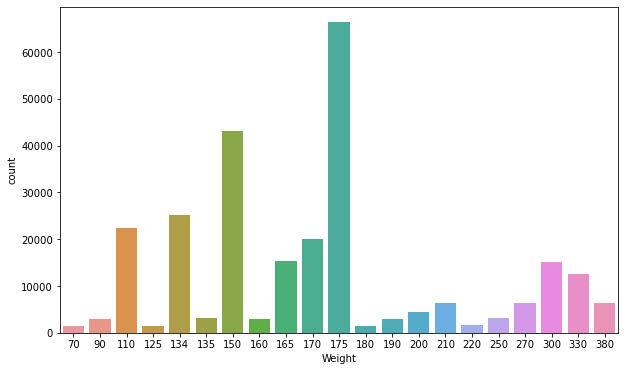

In [13]:
#Note number of purchases not quantity
#****With weight 300 gone the rest of the weights are chip sizes 

fig = plt.figure(figsize = (10, 6))

sns.countplot(x='Weight', data = df2) 

In [ ]:
#Find the price of each product

In [ ]:
df2.groupby('PROD_NAME', axis=1)

In [16]:
%%cython

def cython_feature_extraction(df2, phrase_list, file_name):
    
    import numpy as np
    import pandas as pd

    column_list = df2.columns
    
    df2_size = len(df2.index)
    
    
    for i in phrase_list:

        feature_name = np.tile(0, (df2_size, 1))   
    
    
        for j in np.arange(0, df2_size):  
            
            if i in df2['PROD_NAME'][j]:
                feature_name[j][0] = 1
                
        df2 = pd.concat([df2, pd.DataFrame(feature_name)], axis=1)
        
    
    df2.columns = [*column_list, *phrase_list]    
    
    df2.to_excel(file_name, index = False)

In [22]:
cython_feature_extraction(df2, 
                          
['Old El Paso Salsa   Dip Chnky Tom Ht300g', 
'Old El Paso Salsa   Dip Tomato Med 300g',
'Old El Paso Salsa   Dip Tomato Mild 300g',
'Doritos Salsa Mild  300g',
'Doritos Salsa       Medium 300g',
'Woolworths Mild     Salsa 300g',
'Woolworths Medium   Salsa 300g'],
                          
"QVI_transaction_2.xlsx")

In [38]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Burger,CCs,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,False,...,False,175,False,False,False,False,False,False,False,False
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,False,True,...,False,175,False,False,False,False,False,False,False,False
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,False,...,False,170,False,False,False,False,False,False,False,False
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,False,...,False,175,False,False,False,False,False,False,False,False
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,False,...,False,150,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,False,False,...,False,175,False,False,False,False,False,False,False,False
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,False,False,...,False,175,False,False,False,False,False,False,False,False
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,False,False,...,False,170,False,False,False,False,False,False,False,False
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,False,False,...,False,150,False,False,False,False,False,False,False,False


In [19]:
df2.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Burger', 'CCs', 'Cheetos',
       'Cheezels', 'Cobs', 'Dorito', 'French', 'Grain', 'Infuzions', 'Kettle',
       'Natural', 'Old', 'Pringles', 'Red', 'Smith', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths', 'Weight',
       'Doritos Salsa Mild  300g', 'Woolworths Medium   Salsa 300g'],
      dtype='object')

In [39]:
dates = df2.groupby('DATE').sum()

In [40]:
new_dates = dates.drop( ['LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'STORE_NBR'], axis=1)

In [41]:
new_dates.columns

Index(['PROD_QTY', 'TOT_SALES', 'Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs',
       'Dorito', 'French', 'Grain', 'Infuzions', 'Kettle', 'Natural', 'Old',
       'Pringles', 'Red', 'Smith', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'Woolworths', 'Weight',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Old El Paso Salsa   Dip Tomato Mild 300g', 'Doritos Salsa Mild  300g',
       'Doritos Salsa       Medium 300g', 'Woolworths Mild     Salsa 300g',
       'Woolworths Medium   Salsa 300g', 'Salsa'],
      dtype='object')

In [6]:
new_dates.to_excel("new_dates2.xlsx", index = True)

In [42]:
new_dates

,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,Cheezels,Cobs,Dorito,French,Grain,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
DATE,,,,,,,,,,,,,,,,,,,,,
43282,1394,5372.2,14,22,5,15,21,58,12,18,...,28,132270,14,12,5,6,7,6,3,53
43283,1367,5315.4,12,10,13,12,23,74,6,15,...,24,132001,11,13,10,2,3,4,6,49
43284,1389,5321.8,12,9,8,9,23,65,10,18,...,38,131956,8,11,8,3,4,3,1,38
43285,1373,5309.9,13,11,9,16,16,63,9,21,...,28,129791,6,11,8,3,3,1,3,35
43286,1358,5080.9,14,17,9,9,19,79,8,22,...,34,129415,10,9,14,2,2,6,6,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43642,1380,5305.0,18,17,8,10,31,64,2,17,...,27,135614,9,11,14,2,3,8,6,53
43643,1352,5202.8,12,13,9,13,25,60,9,17,...,30,128170,2,9,7,2,3,7,5,35
43644,1400,5299.6,10,9,8,11,33,60,11,16,...,27,131621,8,11,10,4,6,2,4,45


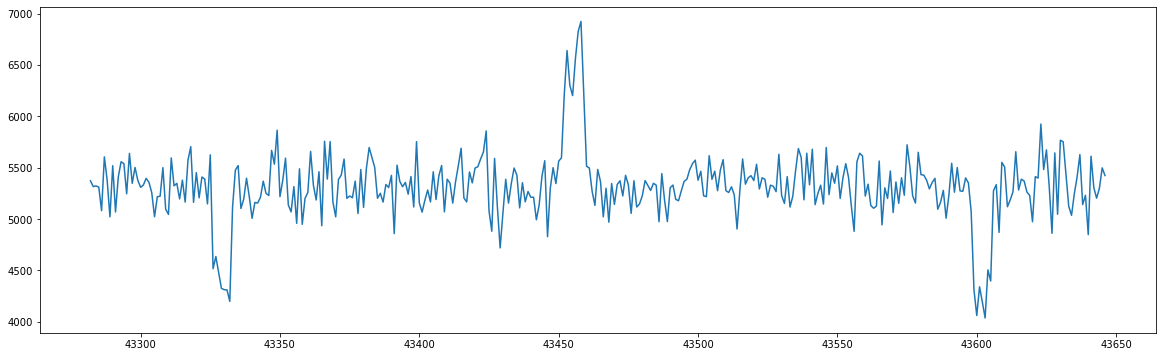

In [43]:
fig = plt.figure(figsize=(20, 6))

plt.plot(new_dates.index, new_dates['TOT_SALES'])

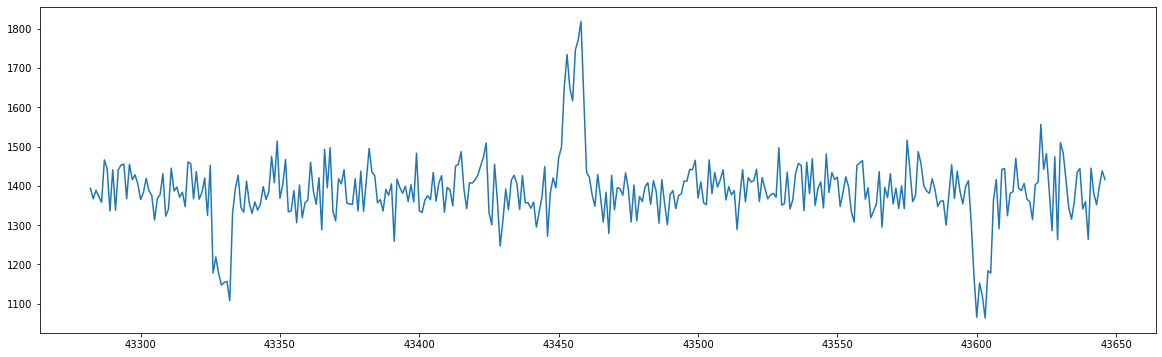

In [44]:
fig = plt.figure(figsize=(20, 6))

plt.plot(new_dates.index, new_dates['PROD_QTY'])

In [45]:
new_dates['TOT_SALES'].mean()

5310.755494505493

In [46]:
new_dates['PROD_QTY'].mean()

1386.6043956043957

In [ ]:
for j in range(0, 11)

        for k in range(0, 2)

In [47]:
df2_no_salsa

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Burger,CCs,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,False,...,False,175,False,False,False,False,False,False,False,False
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,False,True,...,False,175,False,False,False,False,False,False,False,False
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,False,...,False,170,False,False,False,False,False,False,False,False
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,False,...,False,175,False,False,False,False,False,False,False,False
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,False,...,False,150,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,False,False,...,False,175,False,False,False,False,False,False,False,False
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,False,False,...,False,175,False,False,False,False,False,False,False,False
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,False,False,...,False,170,False,False,False,False,False,False,False,False
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,False,False,...,False,150,False,False,False,False,False,False,False,False


In [48]:
df2_no_salsa  = df2.drop(axis=0, index = df2[df2['Salsa']==1].index)

In [49]:
dates_no_salsa = df2_no_salsa.groupby('DATE').sum()

In [50]:
new_dates_no_salsa = dates_no_salsa.drop( ['LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'STORE_NBR'], axis=1)

In [53]:
new_dates_no_salsa['PROD_QTY'].mean()

1307.4478021978023

In [54]:
new_dates_no_salsa['TOT_SALES'].mean()

4999.407692307692

In [ ]:
Metrics/Questions

Q1. Do certain days(e.g. Monday, Tuesday) have more sales?
Q2. What types of customers membership contribute the most to sales(e.g. Budget, Mainstream)?
Q3. What types of demographic of customers contribute to the most sales(e.g Elderly, Young)?
Q4. What is the average of total sales?
Q5. What is the most popular brand of chips?
Q6. What is the most profitable product?
Q7. Which customers buy cheap/expensive chips?
Q8. Do certain months have more sales?
Q9. Which Shop contributes the most to sales?
Q10. Is there any correlation between salsa and chip purchases?
Q11. How many packets do customers tend to buy for each brand?
Q12. How frequently do customers buy chips?
Q13. Do customers prefer smaller or larger packets?
Q14. Is price important?
Q15. Do customers tend to buy the same brand?
Q16. Would having many different kinds of product from the same brand increase profit?
Q17. Are there special days sales increase/decrease e.g. Christmas?
Q18. What is the time period of the sales?

In [ ]:
Not answered

Q1. Do certain days(e.g. Monday, Tuesday) have more sales?
Q2. What types of customers membership contribute the most to sales(e.g. Budget, Mainstream)?
Q3. What types of demographic of customers contribute to the most sales(e.g Elderly, Young)?

Q6. What is the most profitable product?
Q7. Which customers buy cheap/expensive chips?
Q8. Do certain months have more sales?
Q9. Which Shop contributes the most to sales?
Q10. Is there any correlation between salsa and chip purchases?
Q11. How many packets do customers tend to buy for each brand?
Q12. How frequently do customers buy chips?
Q13. Do customers prefer smaller or larger packets?
Q14. Is price important?
Q15. Do customers tend to buy the same brand?
Q16. Would having many different kinds of product from the same brand increase profit?
Q17. Are there special days sales increase/decrease e.g. Christmas?
Q18. What is the time period of the sales?

# Q1 Do certain days(e.g. Monday, Tuesday) have more sales?

In [6]:

df2['Day'] = df2['DATE']%7

In [10]:
df2['Day'] 

"""
Note:

0 -> Saturday
1 -> Sunday
2 -> Monday
3 -> Tuesday
4 -> Wednesday
5 -> Thursday
6 -> Friday

"""

0         4
1         3
2         2
3         6
4         0
         ..
264829    0
264830    2
264831    3
264832    5
264833    0
Name: Day, Length: 264834, dtype: int64

In [7]:
for i in df2.index:
    
    if df2['Day'][i] == 0:
        df2.loc[i, 'Day'] = 'Saturday'

    elif df2['Day'][i] == 1:
        df2.loc[i, 'Day'] = 'Sunday'
    
    elif df2['Day'][i] == 2:
        df2.loc[i, 'Day'] = 'Monday'
        
    elif df2['Day'][i] == 3:
        df2.loc[i, 'Day'] = 'Tuesday'
    
    elif df2['Day'][i] == 4:
        df2.loc[i, 'Day'] = 'Wednesday'
        
    elif df2['Day'][i] == 5:
        df2.loc[i, 'Day'] = 'Thursday'
        
    else:
        df2.loc[i, 'Day'] = 'Friday'

In [8]:
 
df2['Day'].value_counts()

Sunday       38717
Friday       38208
Wednesday    37979
Saturday     37812
Monday       37604
Thursday     37375
Tuesday      37139
Name: Day, dtype: int64

In [11]:
days_data = df2.groupby('Day').sum()

In [15]:
days_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
Day,,,,,,,,,,,,,,,,,,,,,
Friday,1660748507,5166096,5193456639,5169518167,2160243,72870,279521.30,674,635,427,...,2065,6979036,423,427,443,209,212,191,194,2099
Monday,1634294389,5087416,5102874623,5090511675,2128727,71781,274315.95,646,668,393,...,2179,6848150,442,443,456,218,202,219,216,2196
Saturday,1643574387,5083821,5107906269,5086013080,2133851,72012,275612.60,670,644,428,...,2086,6913985,471,476,431,206,211,209,219,2223
Sunday,1682811760,5219787,5230927982,5221585941,2199258,73762,282579.10,712,671,446,...,2121,7031842,475,446,444,201,213,212,184,2175
Thursday,1624469871,5042256,5057986422,5047231853,2113792,71218,272565.65,668,676,407,...,2094,6815008,438,431,465,190,196,232,196,2148
Tuesday,1614147603,5029814,5044193154,5032464759,2106380,70666,270644.00,664,616,411,...,2104,6774895,412,466,410,213,199,211,201,2112
Wednesday,1650708054,5144434,5160584044,5147008517,2142998,72415,277876.40,699,641,415,...,2108,6949562,464,425,436,235,216,217,220,2213


<AxesSubplot:xlabel='Day', ylabel='TOT_SALES'>

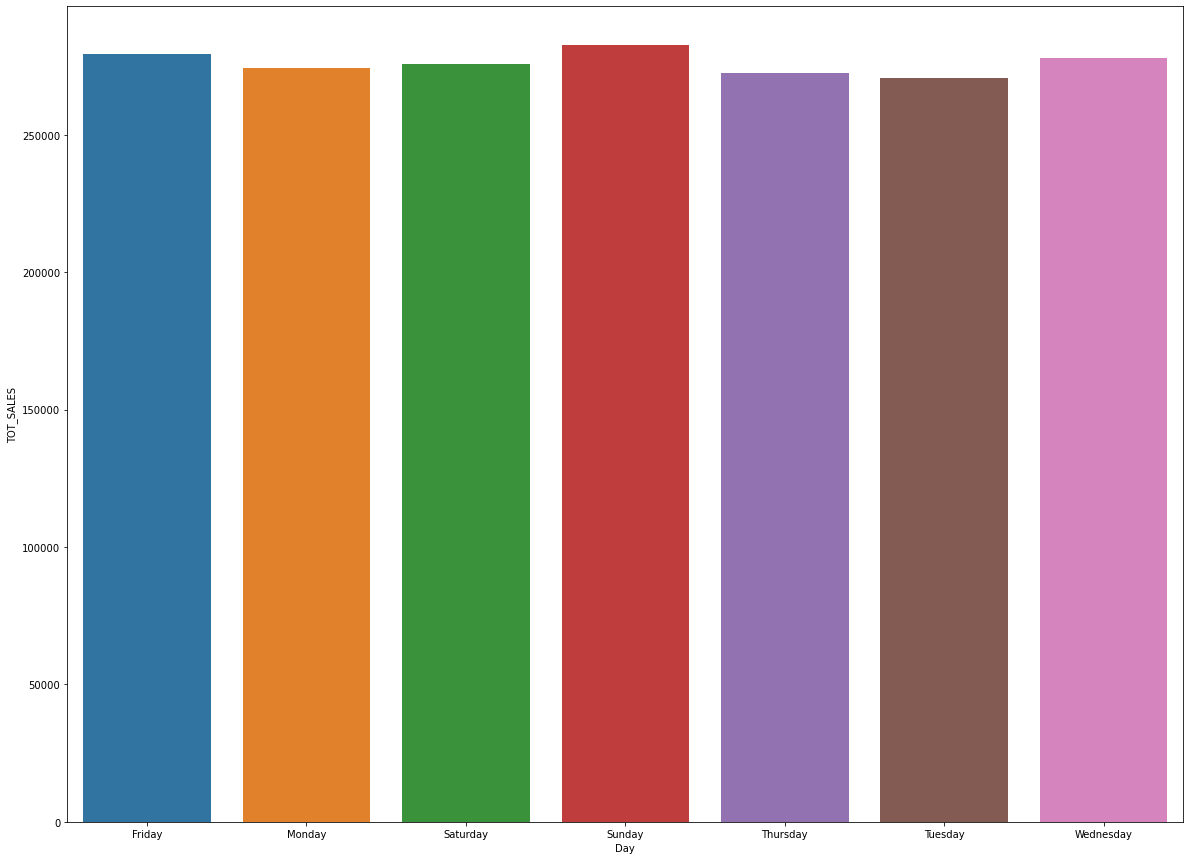

In [33]:
fig = plt.figure(figsize=(20, 15))

sns.barplot(x=days_data.index, y = days_data['TOT_SALES'])

#### Sunday, Friday, Wednesday have slightly (very slight) higher amount of transactions occur.



# Q2. What types of customers membership contribute the most to sales(e.g. Budget, Mainstream)?

In [8]:
df2

,DATE,actual_date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Burger,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
0,43390,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,0,...,0,175,0,0,0,0,0,0,0,0
1,43599,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,0,...,0,175,0,0,0,0,0,0,0,0
2,43605,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,0,...,0,170,0,0,0,0,0,0,0,0
3,43329,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,0,...,0,175,0,0,0,0,0,0,0,0
4,43330,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,0,...,0,150,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,0,...,0,175,0,0,0,0,0,0,0,0
264830,43325,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,0,...,0,175,0,0,0,0,0,0,0,0
264831,43410,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,0,...,0,170,0,0,0,0,0,0,0,0
264832,43461,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,0,...,0,150,0,0,0,0,0,0,0,0


In [6]:
all_data = pd.merge(df2, df, on= 'LYLTY_CARD_NBR')

In [14]:
membership = all_data.groupby('PREMIUM_CUSTOMER').sum()

In [15]:
membership

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
PREMIUM_CUSTOMER,,,,,,,,,,,,,,,,,,,,,
Budget,4048992539,12568324,12618536184,12574511462,5282919,177898,676211.55,1675,1679,1051,...,5486,16971480,1059,1113,1031,548,552,522,520,5345
Mainstream,4432810553,13779828,13829695818,13789459221,5754963,193965,750744.50,1790,1631,1111,...,5193,18646927,1259,1232,1234,529,549,546,517,5866
Premium,3028951479,9425472,9449697131,9430363309,3947367,132861,506158.95,1268,1241,765,...,4078,12694071,807,769,820,395,348,423,393,3955


<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='TOT_SALES'>

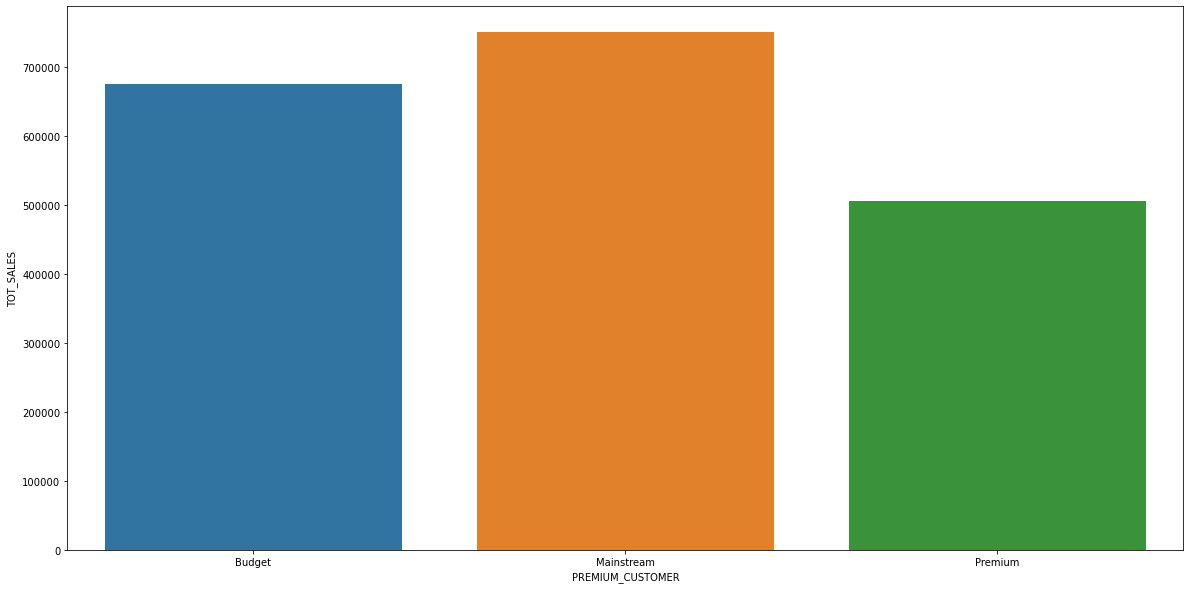

In [20]:
fig = plt.figure(figsize=(20, 10))

sns.barplot(x=membership.index, y = membership['TOT_SALES'])

#### Mainstream customr contribute the most to sales. 

#### This is most likely because there are more Mainstream customers than Budget and Premium

# Q3. What types of demographic of customers contribute to the most sales(e.g Elderly, Young)?

In [9]:
demography = all_data.groupby('LIFESTAGE').sum()

In [10]:
demography

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,...,Woolworths,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa
LIFESTAGE,,,,,,,,,,,,,,,,,,,,,
MIDAGE SINGLES/COUPLES,1091384335,3406542,3420200402,3412143988,1415274,47721,184751.30,434,433,265,...,1289,4588121,317,285,313,107,131,120,137,1410
NEW FAMILIES,300742058,925551,926940419,926468137,391231,12847,50433.45,117,93,62,...,330,1254907,91,83,71,30,28,34,20,357
OLDER FAMILIES,2112088434,6519614,6536420564,6519853971,2755867,94592,352467.20,916,941,615,...,3202,8851536,578,514,497,325,322,292,301,2829
OLDER SINGLES/COUPLES,2367839713,7301523,7336693509,7305210377,3080054,104203,402426.75,960,851,580,...,2893,9936218,624,670,651,304,290,305,272,3116
RETIREES,2162904343,6775695,6798716405,6779576026,2807444,94166,366470.90,921,741,491,...,2451,9090439,608,607,624,239,245,240,266,2829
YOUNG FAMILIES,1894700744,5929361,5945181692,5932986464,2491348,84561,316160.10,759,898,550,...,2761,7929656,480,508,479,286,254,283,267,2557
YOUNG SINGLES/COUPLES,1581094944,4915338,4933776142,4918095029,2044031,66634,260405.30,626,594,364,...,1831,6661601,427,447,450,181,179,217,167,2068


<AxesSubplot:xlabel='LIFESTAGE', ylabel='TOT_SALES'>

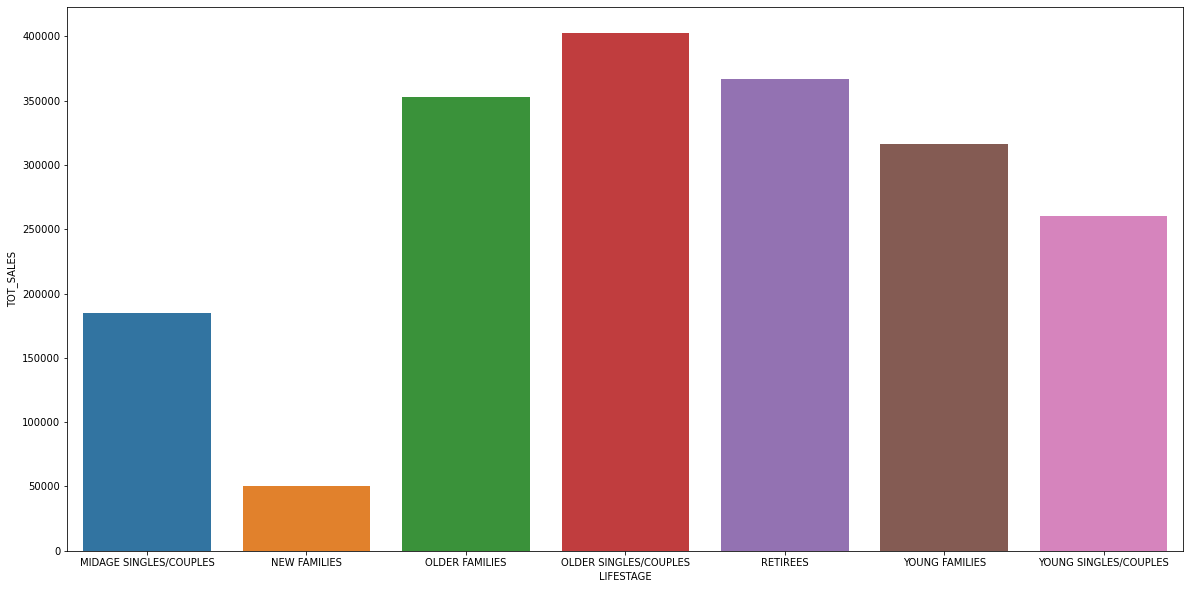

In [24]:
fig = plt.figure(figsize=(20, 10))

sns.barplot(x=demography.index, y = demography['TOT_SALES'])

#### We see that older people tend to contribute significantly more towards sales

In [92]:
demography['TOT_SALES'].sum()

1933114.9999999946

In [17]:
#Expected amount of total sales from each demography assuming 
expected_value = (all_data['LIFESTAGE'].value_counts(normalize = True)*demography['TOT_SALES'].sum()).sort_index()
(all_data['LIFESTAGE'].value_counts(normalize = True)*demography['TOT_SALES'].sum()).sort_index()

MIDAGE SINGLES/COUPLES    183286.578196
NEW FAMILIES               50504.175012
OLDER FAMILIES            354704.419787
OLDER SINGLES/COUPLES     397661.071029
RETIREES                  363237.355268
YOUNG FAMILIES            318193.091068
YOUNG SINGLES/COUPLES     265528.309639
Name: LIFESTAGE, dtype: float64

In [18]:
#Actual value
actual_value  = demography['TOT_SALES']
demography['TOT_SALES']

LIFESTAGE
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
OLDER FAMILIES            352467.20
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
Name: TOT_SALES, dtype: float64

In [19]:
# Actual value -expected value
diff = actual_value - expected_value 
actual_value - expected_value 

LIFESTAGE
MIDAGE SINGLES/COUPLES    1464.721804
NEW FAMILIES               -70.725012
OLDER FAMILIES           -2237.219787
OLDER SINGLES/COUPLES     4765.678971
RETIREES                  3233.544732
YOUNG FAMILIES           -2032.991068
YOUNG SINGLES/COUPLES    -5123.009639
dtype: float64

#### We see that Retirees/Midage/Older single/couples tend to spend slightly more. 

#### We can observed that older singles/couples contribute the most total_sales with respect to their population

# Q4. What is the average of total sales?

In [44]:
avg_tot = df2.drop(df2[df2['Salsa']==1].index )

In [45]:
#Average cost for a transaction
avg_tot['TOT_SALES'].mean()

7.288817149173927

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

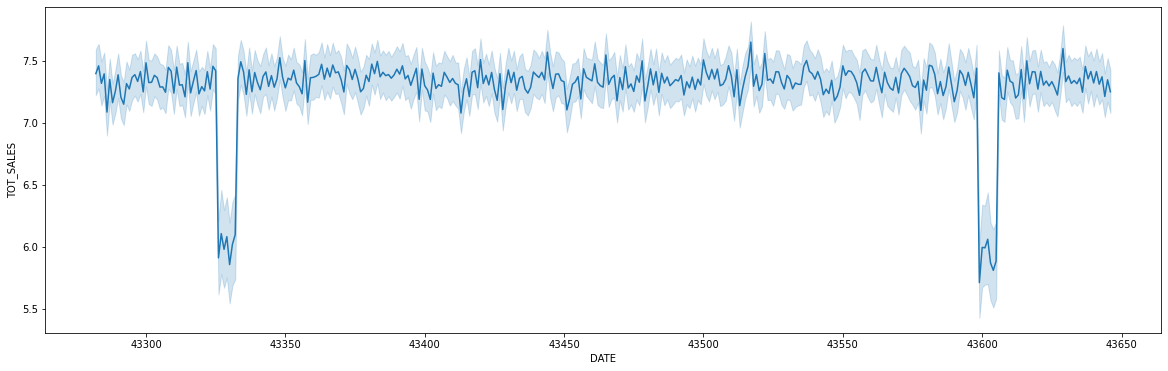

In [47]:
fig = plt.figure(figsize=(20, 6))

sns.lineplot(x = avg_tot['DATE'], y = avg_tot['TOT_SALES'])

In [48]:
avg_tot = avg_tot.groupby('DATE').sum()

In [49]:
#Average cost for a day excluding salsas
avg_tot['TOT_SALES'].mean()

4999.407692307692

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

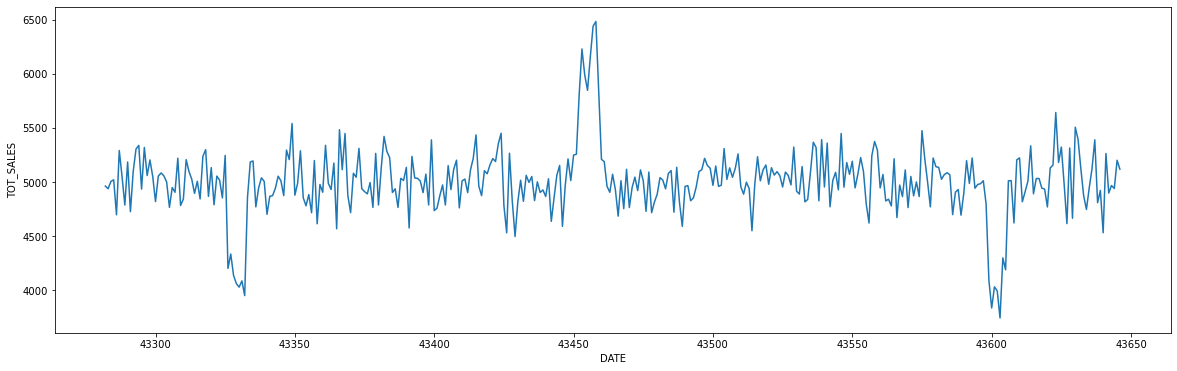

In [50]:
fig = plt.figure(figsize=(20, 6))

sns.lineplot(x = avg_tot.index, y = avg_tot['TOT_SALES'])

# Q5. What is the most popular brand of chips?

In [55]:
#Average number of transactions
new_dates_no_salsa[['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs',
       'Dorito', 'French', 'Grain', 'Infuzions', 'Kettle', 'Natural', 'Old',
       'Pringles', 'Red', 'Smith', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'Woolworths']].mean().sort_values(ascending = False)

Kettle        113.428571
Smith          87.425824
Dorito         69.296703
Pringles       68.961538
Red            48.843407
Infuzions      39.013736
Thins          38.667582
Woolworths     32.516484
Cobs           26.629121
Tostitos       26.019231
Twisties       25.972527
Grain          21.263736
Natural        20.519231
Tyrrells       17.697802
Burger         13.002747
Cheezels       12.645604
CCs            12.502747
Sunbites        8.263736
Cheetos         8.041209
French          7.846154
Old             0.000000
dtype: float64

#### We see that Kettle, Smith, Dorito, Pringles, Red Rock Deli are the 5 most popular brand of chips

# Q6. What is the most profitable product?

In [60]:
df2

,DATE,actual_date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Burger,...,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa,PROD_PRICE
0,43390,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,0,...,175,0,0,0,0,0,0,0,0,3.00
1,43599,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,0,...,175,0,0,0,0,0,0,0,0,2.10
2,43605,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,0,...,170,0,0,0,0,0,0,0,0,1.45
3,43329,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,0,...,175,0,0,0,0,0,0,0,0,3.00
4,43330,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,0,...,150,0,0,0,0,0,0,0,0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,0,...,175,0,0,0,0,0,0,0,0,5.40
264830,43325,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,0,...,175,0,0,0,0,0,0,0,0,4.40
264831,43410,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,0,...,170,0,0,0,0,0,0,0,0,4.40
264832,43461,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,0,...,150,0,0,0,0,0,0,0,0,3.90


In [59]:
df2['PROD_PRICE'] = df2['TOT_SALES'] / df2['PROD_QTY']

In [70]:
pd.set_option('display.max_rows', 115)

In [69]:
df2.groupby('PROD_NAME').mean()['PROD_PRICE'].sort_values(ascending = False)

PROD_NAME
Dorito Corn Chp     Supreme 380g            6.368285
Smiths Crnkle Chip  Orgnl Big Bag 380g      5.900000
Smiths Crinkle Chips Salt & Vinegar 330g    5.700000
Cheezels Cheese 330g                        5.700000
Smiths Crinkle      Original 330g           5.700000
Doritos Cheese      Supreme 330g            5.700000
Kettle Mozzarella   Basil & Pesto 175g      5.400000
Kettle Sea Salt     And Vinegar 175g        5.400000
Kettle Honey Soy    Chicken 175g            5.400000
Kettle Original 175g                        5.399145
Kettle Chilli 175g                          5.399111
Kettle Sweet Chilli And Sour Cream 175g     5.398987
Old El Paso Salsa   Dip Tomato Med 300g     5.100000
Old El Paso Salsa   Dip Tomato Mild 300g    5.099173
Old El Paso Salsa   Dip Chnky Tom Ht300g    5.099021
Kettle Tortilla ChpsHny&Jlpno Chili 150g    4.600000
Twisties Chicken270g                        4.600000
Kettle Tortilla ChpsBtroot&Ricotta 150g     4.600000
Twisties Cheese     270g            

#### We see that per a packet "Doritos corn chips Supreme 380g" is the most profitable not considering expenses 
#### as they have not been included in the data

#### For salsa Old El Paso is the most expensive

In [72]:
df2.groupby('PROD_NAME').sum()['TOT_SALES'].sort_values(ascending=False)

PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Kettle Honey Soy    Chicken 175g            32578.2
Kettle Chilli 175g                          31271.4
Old El Paso Salsa   Dip Chnky Tom Ht300g    30513.3
Old El Paso Salsa   Dip Tomato Med 300g     30237.9
Old El Paso Salsa   Dip Tomato Mild 300g    30033.9
Kettle Tortilla ChpsHny&Jlpno Chili 150g    29021.4
Kettle Sensations   Camembert & Fig 150g    28308.4
Twisties Chicken270g                        27853.0
Kettle Tortilla ChpsBtroot&Ricotta 150g     27770.2
Ke

#### We see Dorito Corn Chips Supreme 380g provide the greatest total profit followed by some smith and kettle chips

# Q6.1 What is the most profitable brand

# Q7. Which customers buy cheap/expensive chips?

In [74]:
all_data.drop(all_data[all_data['Salsa']==1].index, inplace=True )

In [78]:
all_data['PROD_PRICE'] = all_data['TOT_SALES']/all_data['PROD_QTY']

In [85]:
all_data.groupby('PREMIUM_CUSTOMER').mean()['PROD_PRICE']

PREMIUM_CUSTOMER
Budget        3.787937
Mainstream    3.859919
Premium       3.798938
Name: PROD_PRICE, dtype: float64

#### We note that each type of customer (premium, budget, mainstream) on average spend spend aapproximately 3.8 dollars.

#### Note mainstream customers tend to buy slightly more expensive products

In [86]:
all_data.groupby("LIFESTAGE").mean()['PROD_PRICE'].sort_values(ascending=False)

LIFESTAGE
NEW FAMILIES              3.894285
YOUNG SINGLES/COUPLES     3.881340
RETIREES                  3.875784
MIDAGE SINGLES/COUPLES    3.855586
OLDER SINGLES/COUPLES     3.849593
YOUNG FAMILIES            3.735916
OLDER FAMILIES            3.721976
Name: PROD_PRICE, dtype: float64

####  Young/Older families seem to spend buy cheaper products

In [88]:
all_data.groupby(by = ['PREMIUM_CUSTOMER','LIFESTAGE']).mean()['PROD_PRICE'].sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Mainstream        YOUNG SINGLES/COUPLES     4.054144
                  MIDAGE SINGLES/COUPLES    3.981563
Budget            RETIREES                  3.912089
Premium           RETIREES                  3.907402
Budget            NEW FAMILIES              3.907394
Mainstream        NEW FAMILIES              3.903557
Premium           OLDER SINGLES/COUPLES     3.879674
Budget            OLDER SINGLES/COUPLES     3.869798
Premium           NEW FAMILIES              3.855968
Mainstream        RETIREES                  3.830613
                  OLDER SINGLES/COUPLES     3.800156
Premium           MIDAGE SINGLES/COUPLES    3.752993
                  YOUNG FAMILIES            3.748487
Budget            YOUNG FAMILIES            3.746367
                  OLDER FAMILIES            3.730583
                  MIDAGE SINGLES/COUPLES    3.726028
Mainstream        OLDER FAMILIES            3.723238
                  YOUNG FAMILIES            3.709075
Premi

#### We can observe from data still that young/older families tend to buy regardless of membership

# Q8. Do certain months have more sales?

#### The transaction data is a over one year period

In [27]:
#datetime64[ns]

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   DATE                                      264834 non-null  int64         
 1   actual_date                               264834 non-null  datetime64[ns]
 2   STORE_NBR                                 264834 non-null  int64         
 3   LYLTY_CARD_NBR                            264834 non-null  int64         
 4   TXN_ID                                    264834 non-null  int64         
 5   PROD_NBR                                  264834 non-null  int64         
 6   PROD_NAME                                 264834 non-null  object        
 7   PROD_QTY                                  264834 non-null  int64         
 8   TOT_SALES                                 264834 non-null  float64       
 9   Burger         

In [7]:
month = np.tile(0, (len(all_data.index), 1))

for i in range(0, len(all_data.index)):
    
    month[i][0] = all_data['actual_date'][i].month
    

all_data = pd.concat([all_data, pd.DataFrame(month)], axis =1)

In [8]:
all_data.rename(columns = {0 :'Months'}, inplace = True)

In [9]:
months  = all_data.groupby('Months').sum()

In [10]:
months.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

<AxesSubplot:ylabel='TOT_SALES'>

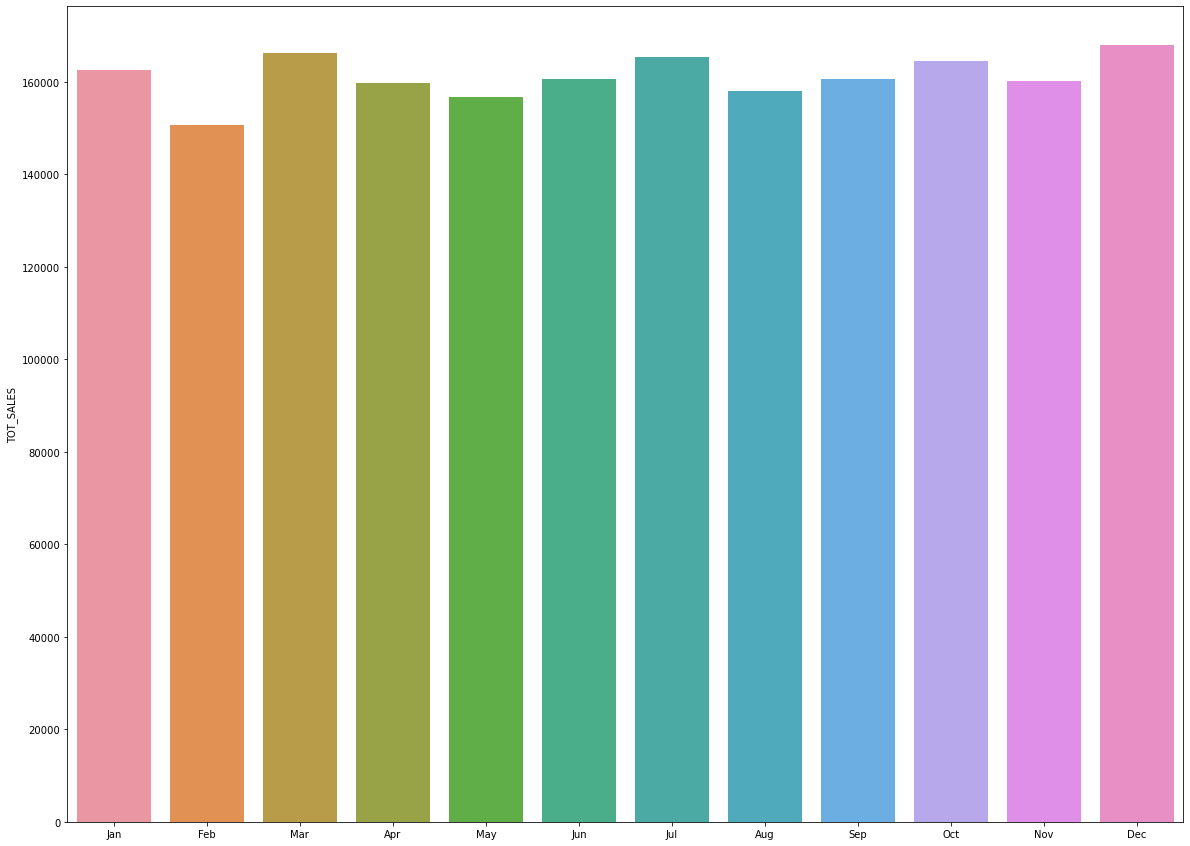

In [11]:
fig = plt.figure(figsize =(20, 15))

sns.barplot(x=months.index, y= months['TOT_SALES'])

#### We see that greatest sales occur in december followed by march. 

#### The large amount of sales in december is becuase of Christmas. 
#### For some unknown reason the difference between march and december total sales is quite small.

#### IT may be worth looking into why the sales of march are so high.

#### On the other hand the lowest sales seem to occur in Feburary and May. 
#### I have tried looking into thisbut was not able to find a cause.

# Q9. Which Shop contributes the most to sales?

In [20]:
all_data['STORE_NBR'].value_counts().sort_values()

92        1
76        1
31        2
211       2
206       2
       ... 
237    1785
165    1819
93     1832
88     1873
226    2020
Name: STORE_NBR, Length: 272, dtype: int64

In [39]:
#Store with lowest sale including salsa
stores[stores['TOT_SALES']==5.2]

,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,Cheezels,...,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa,Months
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
211,86863,422642,421031,142,2,5.2,0,0,0,0,...,600,0,0,0,1,1,0,0,2,11


In [37]:
#Store nbr 226 has highest sales including salsa
stores[stores['TOT_SALES']==17605.44999999996]

,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,Cheezels,...,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa,Months
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
226,87802158,456907602,459040559,111025,4001,17605.45,34,0,0,30,...,377441,39,38,27,0,0,0,0,104,13431


In [26]:
stores.describe()

,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Burger,CCs,Cheetos,Cheezels,...,Weight,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa,Months
count,2.720000e+02,2.720000e+02,2.720000e+02,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,4.231895e+07,1.319777e+08,1.315968e+08,55092.827206,1855.602941,7107.040441,17.400735,16.731618,10.761029,16.922794,...,177619.404412,11.488971,11.448529,11.341912,5.411765,5.327206,5.481618,5.257353,55.757353,6363.650735
std,2.554711e+07,1.174323e+08,1.183974e+08,33331.304287,1215.104109,4705.862960,11.345841,18.380702,12.117425,11.082278,...,107244.511565,9.025173,8.831192,9.018882,6.316347,6.158389,6.356537,6.109090,34.643998,3836.956962
min,4.339400e+04,2.274600e+04,2.101500e+04,45.000000,2.000000,5.200000,0.000000,0.000000,0.000000,0.000000,...,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2.298418e+07,3.192206e+07,2.858075e+07,29440.000000,817.250000,2899.425000,8.000000,0.000000,0.000000,8.000000,...,95777.250000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,28.750000,3476.000000
50%,2.951251e+07,1.037856e+08,1.036478e+08,38919.000000,1353.500000,5972.625000,15.500000,12.000000,6.000000,15.500000,...,124627.500000,10.000000,10.000000,10.000000,2.000000,3.000000,3.000000,3.000000,47.000000,4512.500000
75%,6.630081e+07,1.905095e+08,1.912434e+08,86063.250000,3010.000000,10952.775000,27.000000,36.000000,23.000000,27.000000,...,278654.750000,16.250000,15.250000,15.000000,10.000000,10.250000,10.000000,10.000000,87.000000,9969.500000
max,8.780216e+07,4.569076e+08,4.590406e+08,111025.000000,4001.000000,17605.450000,45.000000,56.000000,39.000000,41.000000,...,377441.000000,42.000000,40.000000,49.000000,24.000000,22.000000,26.000000,20.000000,126.000000,13431.000000


# Q10. Is there any correlation between salsa and chip purchases?

In [64]:
chips_purchase = all_data[['Burger', 'CCs',
       'Cheetos', 'Cheezels', 'Cobs', 'Dorito', 'French', 'Grain', 'Infuzions',
       'Kettle', 'Natural', 'Old', 'Pringles', 'Red', 'Smith', 'Sunbites',
       'Thins', 'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths']].sum(axis=1)

In [59]:
from scipy.stats import pearsonr

In [74]:
chips_purchase[chips_purchase == 2].index

Int64Index([    59,    149,    302,    332,    346,    374,    416,    418,
               434,    516,
            ...
            264241, 264306, 264308, 264547, 264549, 264638, 264687, 264733,
            264759, 264794],
           dtype='int64', length=4607)

In [63]:
all_data

,DATE,actual_date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Burger,...,Old El Paso Salsa Dip Chnky Tom Ht300g,Old El Paso Salsa Dip Tomato Med 300g,Old El Paso Salsa Dip Tomato Mild 300g,Doritos Salsa Mild 300g,Doritos Salsa Medium 300g,Woolworths Mild Salsa 300g,Woolworths Medium Salsa 300g,Salsa,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,0,...,0,0,0,0,0,0,0,0,YOUNG SINGLES/COUPLES,Premium
1,43599,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,0,...,0,0,0,0,0,0,0,0,MIDAGE SINGLES/COUPLES,Budget
2,43414,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,0,...,0,0,0,0,0,0,0,0,MIDAGE SINGLES/COUPLES,Budget
3,43533,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,0,...,0,0,0,0,0,0,0,0,MIDAGE SINGLES/COUPLES,Budget
4,43605,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,0,...,0,0,0,0,0,0,0,0,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,0,...,0,0,0,0,0,0,0,0,YOUNG SINGLES/COUPLES,Premium
264830,43325,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,0,...,0,0,0,0,0,0,0,0,YOUNG SINGLES/COUPLES,Premium
264831,43410,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,0,...,0,0,0,0,0,0,0,0,YOUNG SINGLES/COUPLES,Premium
264832,43461,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,0,...,0,0,0,0,0,0,0,0,YOUNG SINGLES/COUPLES,Premium


In [47]:
pearsonr(chips_purchase, all_data['Salsa'])

ValueError: x and y must have the same length.

# Q11. How many packets do customers tend to buy for each brand?

# Q12. How frequently do customers buy chips?

# Q13. Do customers prefer smaller or larger packets?

# Q14. Is price important?

# Q15. Do customers tend to buy the same brand?

# Q16. Would having many different kinds of product from the same brand increase profit?

# Q17. Are there special days sales increase/decrease e.g. Christmas?

# Q18. What is the time period of the sales?

In [24]:
min(all_data['actual_date'])

Timestamp('2018-07-01 00:00:00')

In [23]:
max(all_data['actual_date'])

Timestamp('2019-06-30 00:00:00')